In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ и предварительная обработка данных

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1BfjozOw-7m9onFCdEjVYw7qXg9x6BnT-&export=download' -O neo_task.csv

--2023-04-15 10:08:42--  https://drive.google.com/u/0/uc?id=1BfjozOw-7m9onFCdEjVYw7qXg9x6BnT-&export=download
Resolving drive.google.com (drive.google.com)... 173.194.218.139, 173.194.218.100, 173.194.218.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1BfjozOw-7m9onFCdEjVYw7qXg9x6BnT-&export=download [following]
--2023-04-15 10:08:43--  https://drive.google.com/uc?id=1BfjozOw-7m9onFCdEjVYw7qXg9x6BnT-&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rs4u2cm5a03jqgflstvha9tqkquk9o9f/1681553250000/06789500609444976556/*/1BfjozOw-7m9onFCdEjVYw7qXg9x6BnT-?e=download&uuid=ef3b2ca1-fa9c-4485-b0a8-3aa374bc85e0 [following]
--2023-04-15 10:08:44--  https://doc-04-90-docs.googleuserconten

In [ ]:
df = pd.read_csv("neo_task.csv")
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [ ]:
df = df.drop(columns=['name', 'id'])

In [ ]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


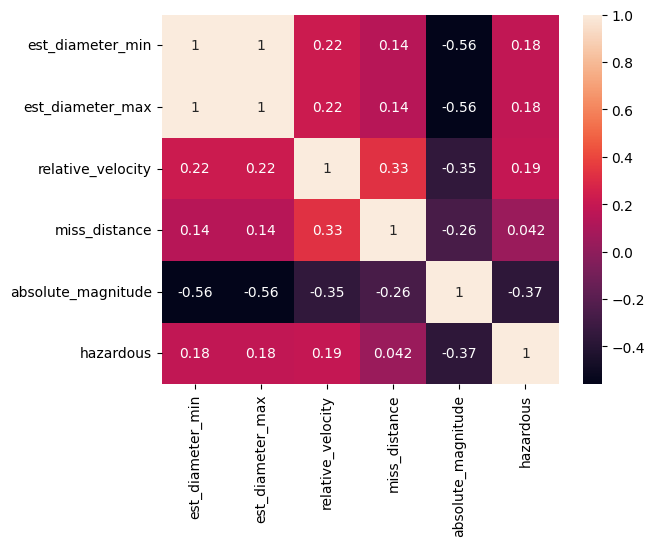

In [ ]:
sns.heatmap(df.corr(), annot=True);

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


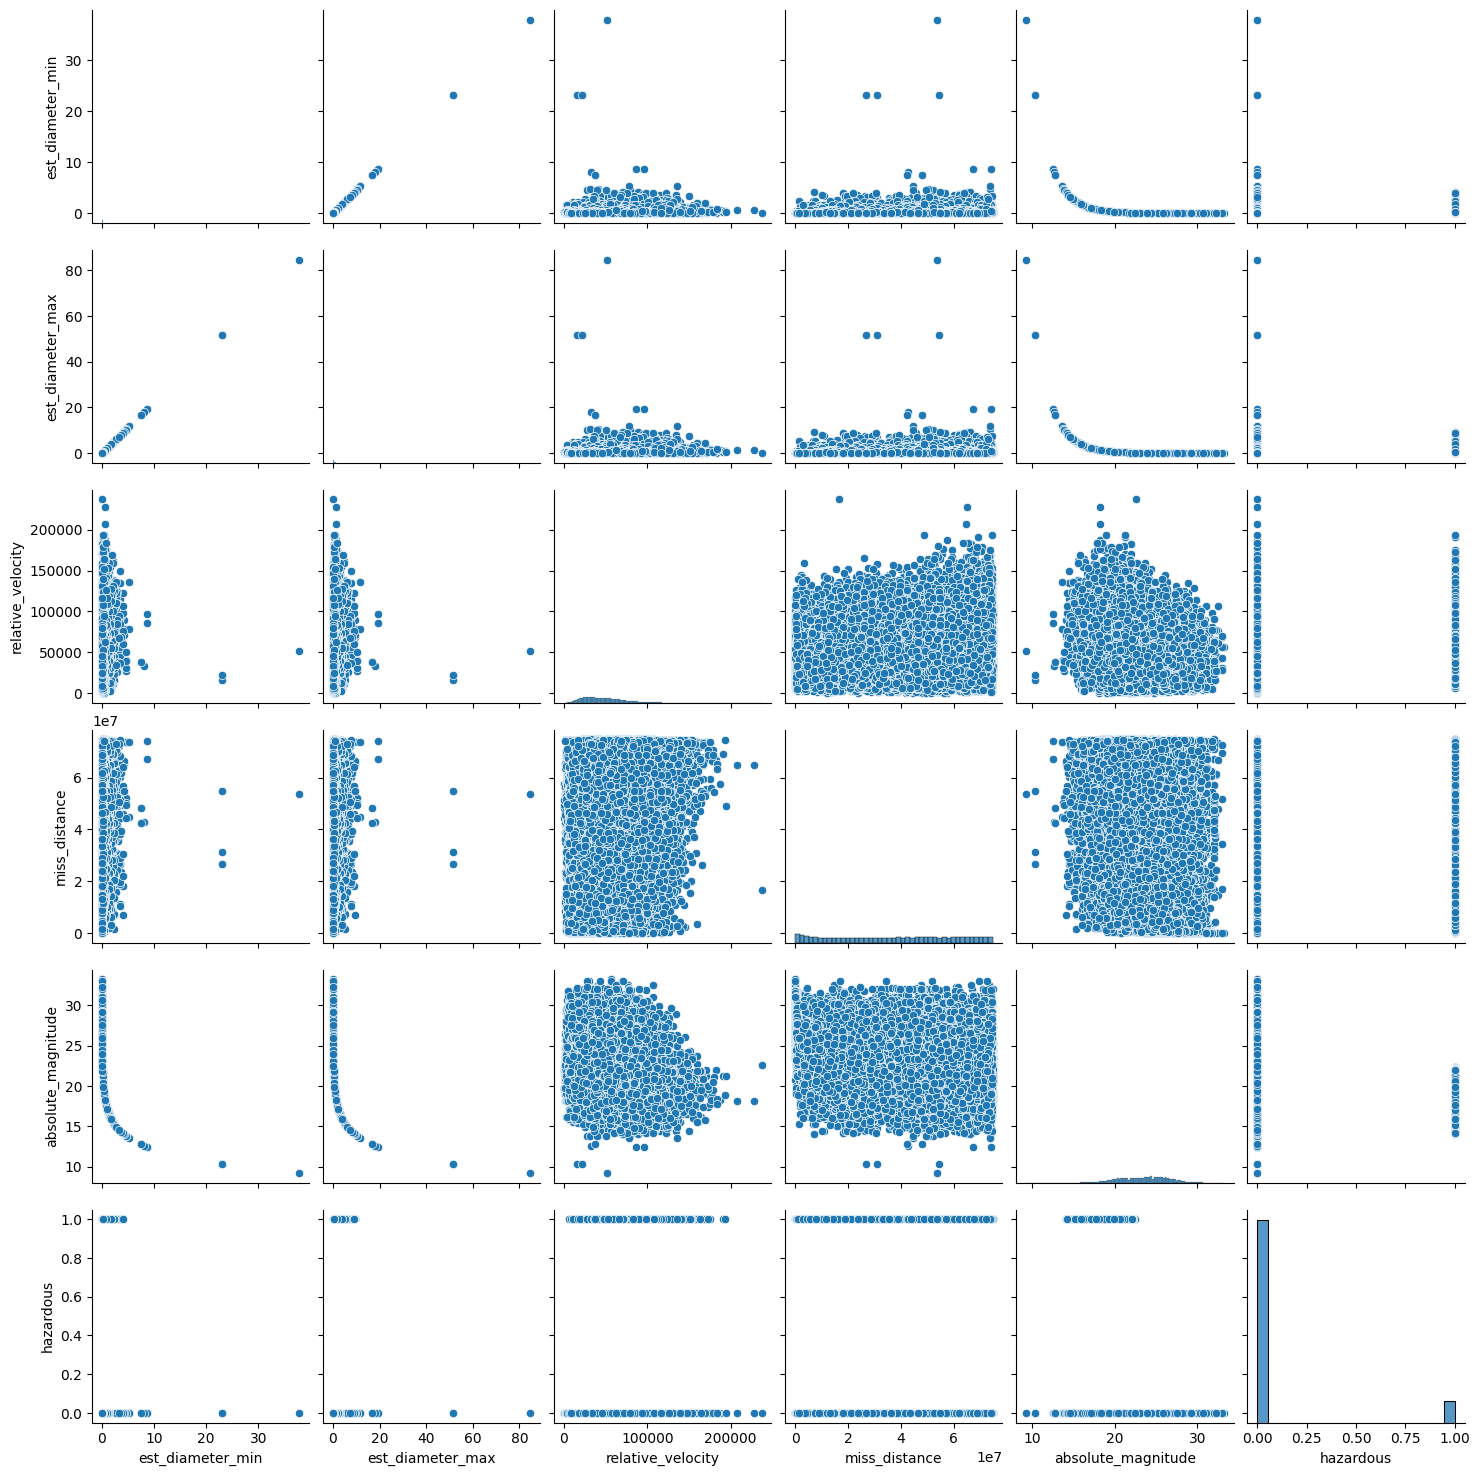

In [ ]:
sns.pairplot(df)

Признаки est_diameter_min и	est_diameter_max - линейно зависимы,

значения некоторых признаков значительно различаются - возможно, в дальнейшем придется нормализировать данные.

In [ ]:
df = df.drop(["est_diameter_min"], axis = 1)
df

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.035813,56014.078517,1.024333e+06,26.10,False
1,0.068240,7864.348060,3.268186e+07,24.70,False
2,0.124177,55257.544508,6.538636e+07,23.40,False
3,0.043057,41531.404722,1.260796e+07,25.70,False
4,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...
90831,0.039268,23264.740825,1.635007e+06,25.90,False
90832,0.247765,24802.519406,3.351901e+07,21.90,False
90833,0.078350,116288.999548,5.471396e+07,24.40,False
90834,0.098637,45763.317060,2.694877e+07,23.90,False


In [ ]:
df.isna().sum()

est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

In [ ]:
print('процент пропусков')
for col in df.columns:
    print(f'{col}: {df[col].isna().sum() / df.shape[0] * 100:.2f}%')

процент пропусков
est_diameter_max: 0.50%
relative_velocity: 0.61%
miss_distance: 0.00%
absolute_magnitude: 0.75%
hazardous: 0.00%


In [ ]:
numeric_cols = ['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
df_numeric = df[numeric_cols]
means = df_numeric.mean()
df[numeric_cols] = df_numeric.fillna(means)

df.isna().sum()

est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
df["hazardous"] = df["hazardous"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_max    90836 non-null  float64
 1   relative_velocity   90836 non-null  float64
 2   miss_distance       90836 non-null  float64
 3   absolute_magnitude  90836 non-null  float64
 4   hazardous           90836 non-null  float64
dtypes: float64(5)
memory usage: 3.5 MB


In [ ]:
df.to_csv("df_preprocessed.csv", index=False)

In [ ]:
df.to_csv("/content/drive/MyDrive/datasets/df_preprocessed.csv", encoding="utf-8", sep=';', index=False)

# Моделирование

## 1) Загрузить предобработанные данные

In [ ]:
df2 = pd.read_csv("df_preprocessed.csv")
df2

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.035813,56014.078517,1.024333e+06,26.10,0.0
1,0.068240,7864.348060,3.268186e+07,24.70,0.0
2,0.124177,55257.544508,6.538636e+07,23.40,0.0
3,0.043057,41531.404722,1.260796e+07,25.70,0.0
4,0.311918,67639.394481,7.130590e+07,21.40,0.0
...,...,...,...,...,...
90831,0.039268,23264.740825,1.635007e+06,25.90,0.0
90832,0.247765,24802.519406,3.351901e+07,21.90,0.0
90833,0.078350,116288.999548,5.471396e+07,24.40,0.0
90834,0.098637,45763.317060,2.694877e+07,23.90,0.0


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

## 2) Выделить целевой признак

In [ ]:
y = df2['hazardous']
X = df2.drop(['hazardous'], axis=1)

In [ ]:
X

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.035813,56014.078517,1.024333e+06,26.10
1,0.068240,7864.348060,3.268186e+07,24.70
2,0.124177,55257.544508,6.538636e+07,23.40
3,0.043057,41531.404722,1.260796e+07,25.70
4,0.311918,67639.394481,7.130590e+07,21.40
...,...,...,...,...
90831,0.039268,23264.740825,1.635007e+06,25.90
90832,0.247765,24802.519406,3.351901e+07,21.90
90833,0.078350,116288.999548,5.471396e+07,24.40
90834,0.098637,45763.317060,2.694877e+07,23.90


## 3) train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72668, 4), (72668,), (18168, 4), (18168,))

## 4) StandartScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[ 1.4110094 ,  0.74805686,  0.23752712, -1.70743793],
       [-0.42034747, -0.95834688,  0.69479147,  0.97257791],
       [-0.43635464, -0.78616916,  0.20955343,  1.23953938],
       ...,
       [-0.41703951, -0.29717688, -0.44776835,  0.92750649],
       [-0.09786302, -0.32208972,  1.18457641, -0.49397669],
       [-0.39892265, -0.33350097, -1.1366207 ,  0.71948456]])

## 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay


### KNN

In [ ]:
knn_optimal = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(2, 5),
                  'p': np.arange(1, 2),
                  "metric" : ["euclidean", "minkowski"]
                  }
                  ).fit(X_train_scaled, y_train)

y_pred = knn_optimal.predict(X_test_scaled)

In [ ]:
print("classification report:\n", classification_report(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     16400
         1.0       0.56      0.22      0.32      1768

    accuracy                           0.91     18168
   macro avg       0.74      0.60      0.63     18168
weighted avg       0.89      0.91      0.89     18168


Confusion: 
 [[16093   307]
 [ 1376   392]]


### LogisticRegression

In [ ]:
lr_optimal = GridSearchCV(LogisticRegression(),
                  {#'penalty': ['l1', 'l2','None'],
                  #'C': np.logspace(-4, 4, 50),
                  'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                  }
                  ).fit(X_train_scaled, y_train)

y_pred = lr_optimal.predict(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print("classification report:\n", classification_report(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     16400
         1.0       0.45      0.06      0.11      1768

    accuracy                           0.90     18168
   macro avg       0.68      0.53      0.53     18168
weighted avg       0.86      0.90      0.87     18168


Confusion: 
 [[16266   134]
 [ 1660   108]]


### DecisionTreeClassifier

In [ ]:
dt_optimal = GridSearchCV(DecisionTreeClassifier(),
                  {'criterion': ["gini", "entropy", "log_loss"],
                  'max_depth': np.arange(1, X_train_scaled.shape[1]),
                  #'max_leaf_nodes': np.array(range(1, int((X_train_scaled.shape[0])**1/4)))
                  }
                  ).fit(X_train_scaled, y_train)

y_pred = dt_optimal.predict(X_test_scaled)

In [ ]:
print("classification report:\n", classification_report(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     16400
         1.0       0.81      0.13      0.22      1768

    accuracy                           0.91     18168
   macro avg       0.86      0.56      0.59     18168
weighted avg       0.90      0.91      0.88     18168


Confusion: 
 [[16347    53]
 [ 1541   227]]


### BaggingClassifier

In [ ]:
bagging_optimal = GridSearchCV(BaggingClassifier(),
                  {#'n_estimators': np.arange(1, 150, 10),
                  'max_samples': np.arange(0.6, 1, 0.1)
                  }
                  ).fit(X_train_scaled, y_train)

y_pred = bagging_optimal.predict(X_test_scaled)

In [ ]:
print("classification report:\n", classification_report(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     16400
         1.0       0.57      0.29      0.38      1768

    accuracy                           0.91     18168
   macro avg       0.75      0.63      0.67     18168
weighted avg       0.89      0.91      0.90     18168


Confusion: 
 [[16012   388]
 [ 1256   512]]


### TensorFlow

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import numpy as np

In [ ]:
model_classification_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),

        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
# в качестве функции активации используется бинарная  кроссэнтропия
model_classification_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")
model_classification_1.fit(X_train_scaled, y_train, epochs=10, verbose=None)

In [ ]:
y_pred = np.around(model_classification_1.predict(X_test_scaled, verbose=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     16400
         1.0       0.82      0.13      0.23      1768

    accuracy                           0.91     18168
   macro avg       0.86      0.57      0.59     18168
weighted avg       0.90      0.91      0.88     18168

[[16346    54]
 [ 1530   238]]


In [ ]:
w0 = 1 / y_train[y_train==0].shape[0]
w1 = 1 / y_train[y_train==1].shape[0]

In [ ]:
model_classification_1.fit(X_train_scaled, y_train, epochs=25, verbose=None,
                           class_weight={0: w0, 1: w1})
y_pred = np.around(model_classification_1.predict(X_test_scaled, verbose=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     16400
         1.0       0.31      0.99      0.48      1768

    accuracy                           0.79     18168
   macro avg       0.66      0.88      0.67     18168
weighted avg       0.93      0.79      0.83     18168

[[12591  3809]
 [   17  1751]]


In [ ]:
model_classification_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 1

## Сохранение

Лучшей моделью оказался Bagging

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pickle.dump(bagging_optimal, open('/content/drive/MyDrive/BaggingClassifier.sav', 'wb'))

In [ ]:
bg_restored = pickle.load(open('/content/drive/MyDrive/BaggingClassifier.sav', 'rb'))
print(classification_report(y_test, bg_restored.predict(X_test_scaled)))
print(confusion_matrix(y_test, bg_restored.predict(X_test_scaled)))
bg_restored.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     16400
         1.0       0.57      0.29      0.38      1768

    accuracy                           0.91     18168
   macro avg       0.75      0.63      0.67     18168
weighted avg       0.89      0.91      0.90     18168

[[16012   388]
 [ 1256   512]]


array([1., 0., 0., ..., 0., 0., 0.])

## Инференс

In [ ]:
!pip install -q numpy pandas scikit-learn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 117.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
data_path = "https://drive.google.com/file/d/1-5YpWTDSEAFGKIW7zTNFqPmQkUrlWDWC/view?usp=sharing"

# путь до файла с сериализованной моделью
model_path = "https://drive.google.com/file/d/1BXO3em5PKiUYMUsY0GXhf-WeMSt80JsC/view?usp=sharing"

In [ ]:
import os

id_slice = slice(32, 65)

data_file_id = data_path[id_slice]
model_file_id = model_path[id_slice]

os.system(f"wget -q -O preprocessed_data.csv https://drive.google.com/uc?id={data_file_id}")
os.system(f"wget -q -O model.pkl https://drive.google.com/uc?id={model_file_id}")

0

In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st
from sklearn.metrics import confusion_matrix, classification_report


def main():
    model = load_model("model.pkl")
    test_data = load_test_data("preprocessed_data.csv")

    y = test_data['hazardous']
    X = test_data.drop(['hazardous'], axis=1)

    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание задачи и данных", "Запрос к модели"]
    )

    if page == "Описание задачи и данных":
        st.title("Описание задачи и данных")
        st.write("Выберите страницу слева")

        st.header("Описание задачи")
        st.markdown("""
        Набор данных содержит информацию о сертифицированных НАСА астероидах, вращающихся вокруг Земли.\n
        Цель этой модели - предсказать, является ли конкретный астероид опасным для Земли или нет, на основе определенных параметров, доступных в наборе данных.
        """)

        st.header("Описание данных")
        st.markdown("""Предоставленные данные:\n
вещественные признаки:
* est_diameter_max - размер объекта
* relative_velocity - скорость объекта относительно Земли
* miss_distance - дистанция пролета в километрах
* absolute_magnitude - абсолютная звёздная величина\n
бинарный признак:
* hazardous - показывает, является ли астероид опасным или нет""")

    elif page == "Запрос к модели":
        st.title("Запрос к модели")
        st.write("Выберите страницу слева")
        request = st.selectbox(
            "Выберите запрос",
            ["Сделать прогноз", "Метрики", "Первые 20 предсказанных значений"]
        )

        if request == "Метрики":
            st.header("Метрики")
            y_pred = model.predict(X)
            cr=classification_report(y, y_pred)
            st.write(cr)
            #'Classification Report: ',cr
            st.write(confusion_matrix(y, y_pred))
        elif request == "Первые 20 предсказанных значений":
            st.header("Первые 20 предсказанных значений")
            y_pred = model.predict(X.iloc[:20,:])
            for item in y_pred:
                st.write(f"{item:.2f}")
        elif request == "Сделать прогноз":
            st.header("Сделать прогноз")

            est_diameter_max = st.number_input("est_diameter_max", 0., 100.)
            relative_velocity = st.number_input("relative_velocity", 100., 300000.)
            miss_distance = st.number_input("miss_distance", 5e+2, 8e+07)
            absolute_magnitude = st.number_input("absolute_magnitude", 0., 50.)

            if st.button('Предсказать'):
                data = [est_diameter_max,	relative_velocity,	miss_distance,	absolute_magnitude]
                data = np.array(data).reshape((1, -1))
                pred = model.predict(data)

                if pred[0]:
                  st.write("Возможна угроза")
                else:
                  st.write("Не представляет опасности")
            else:
                pass



@st.cache_data
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model


@st.cache_data
def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, sep=";")
    return df


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.012s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.376s
your url is: https://metal-shrimps-beam-35-196-217-38.loca.lt


[Ссылка на приложение](https://stilsman-ml-tad-streamlit-app-c6sipl.streamlit.app/)

[Ссылка на репозиторий](https://github.com/stilsman/ML_TAD_streamlit)

In [ ]:
https://stilsman-ml-tad-streamlit-app-c6sipl.streamlit.app/
https://github.com/stilsman/ML_TAD_streamlit